# Data Preprocessing

Importing required modules

In [1]:
import numpy as np
import pandas as pd 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [3]:
data = pd.read_csv('C:/Users/PRIYAL SOBTIPRIYAL.1/Desktop/AutismData/Toddler Autism dataset July 2018.csv')
data1 = pd.read_csv('C:/Users/PRIYAL SOBTIPRIYAL.1/Desktop/AutismData/Autism_Data.arff')

In [4]:
print(data.head())
print(data1.info())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1     

Deduction of some important information

Text(0.5,1,'Age distribution of ASD positive')

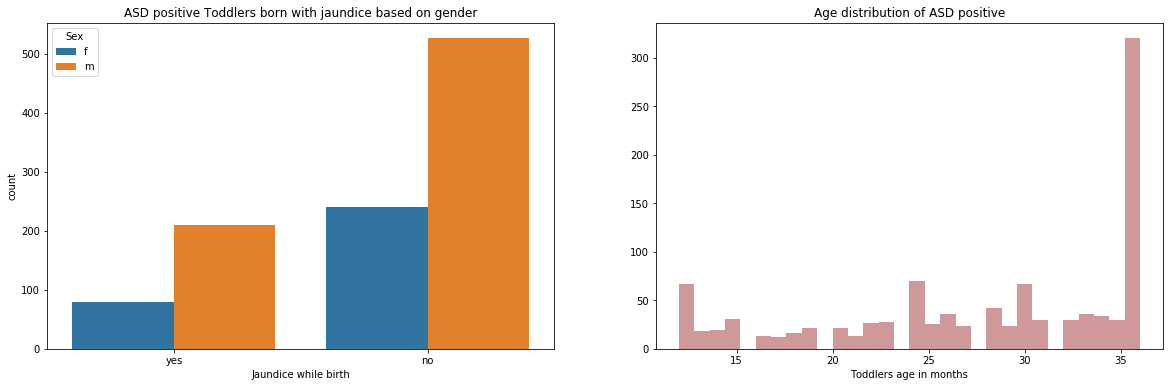

In [5]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='Jaundice',data=data,hue='Sex',ax=ax[0])
ax[0].set_title('ASD positive Toddlers born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')
sns.distplot(data['Age_Mons'],kde=False,bins=30,color='darkred',ax=ax[1])
ax[1].set_xlabel('Toddlers age in months')
ax[1].set_title('Age distribution of ASD positive')

Text(0.5,1,'Age distribution of ASD positive')

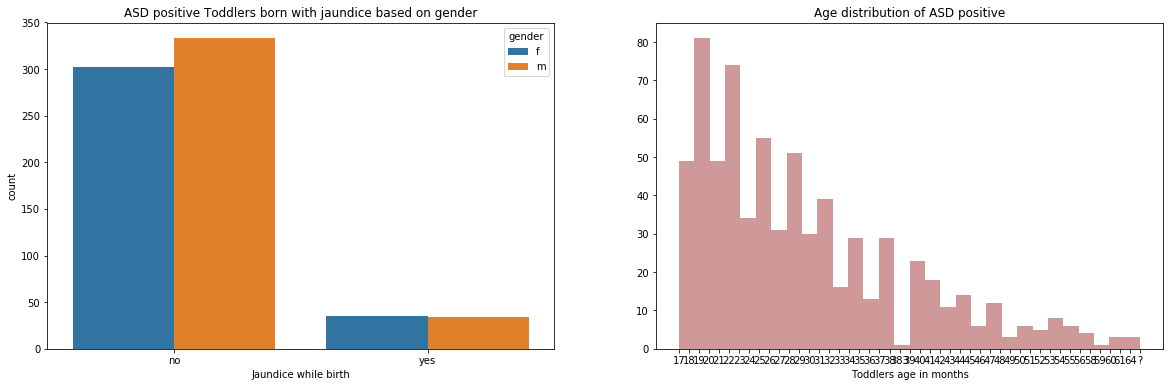

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='jundice',data=data1,hue='gender',ax=ax[0])
ax[0].set_title('ASD positive Toddlers born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')
sns.distplot(data1['age'],kde=False,bins=30,color='darkred',ax=ax[1])
ax[1].set_xlabel('Toddlers age in months')
ax[1].set_title('Age distribution of ASD positive')

Dropping the columns that are not required in the analysis

In [7]:
columns = ['Ethnicity','Who completed the test','Qchat-10-Score','Case_No']
data.drop(columns, inplace=True, axis=1)

In [8]:
columns1 = ['ethnicity','used_app_before','age_desc','relation']
data1.drop(columns1, inplace=True, axis=1)

Converting relevant data into binary using general method and one-hot encoding

In [9]:
data['Jaundice'] = data['Jaundice'].map({'yes': 1, 'no': 0})
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].map({'yes': 1, 'no': 0})
data['Sex'] = data['Sex'].map({'m': 1, 'f': 0})

In [10]:
data1.rename(columns={"jundice":"jaundice","austim":"autism"}, 
                 inplace=True)

In [11]:
data1['jaundice'] = data1['jaundice'].map({'yes': 1, 'no': 0})
data1['autism'] = data1['autism'].map({'yes': 1, 'no': 0})
data1['gender'] = data1['gender'].map({'m': 1, 'f': 0})

In [12]:
ASD_Traits=pd.get_dummies(data['Class/ASD Traits '],drop_first=True)

Displaying the mean to find out toddlers with ages less than or greater than mean

In [13]:
print(data["Age_Mons"].mean())

27.86717267552182


In [14]:
Age_gthan27 = pd.get_dummies(data['Age_Mons']>27,drop_first=True)
Age_lthan27 = pd.get_dummies(data['Age_Mons']<27,drop_first=True)

In [15]:
asd_Traits=pd.get_dummies(data1['Class/ASD'],drop_first=True)
Age_grthan27= pd.get_dummies(data1['age']>'27',drop_first=True)
Age_lessthan27 = pd.get_dummies(data1['age']<'27',drop_first=True)

Creating data with all the changes

In [16]:
changed_data= pd.concat([data.A1,data.A2,data.A3,data.A4,data.A5,data.A6,data.A7,data.A8,data.A9,data.A10,Age_gthan27,Age_lthan27,data.Sex,data.Jaundice,data.Family_mem_with_ASD,ASD_Traits],axis=1)
changed_data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_gthan27','Age_lthan27','Male','Jaundice','Family_mem_with_ASD','ASD_traits']

In [17]:
changed_data1= pd.concat([data1.A1_Score,data1.A2_Score,data1.A3_Score,data1.A4_Score,data1.A5_Score,data1.A6_Score,data1.A7_Score,data1.A8_Score,data1.A9_Score,data1.A10_Score,Age_grthan27,Age_lessthan27,data1.gender,data1.jaundice,data1.autism,asd_Traits],axis=1)
changed_data1.columns=['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','Age_grthan27','Age_lessthan27','Male','jaundice','Autism','asd_Traits']

In [18]:
changed_data.head();

In [19]:
print(changed_data);

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_gthan27  Age_lthan27  Male  \
0      0   0   0   0   0   0   1   1   0    1            1            0     0   
1      1   1   0   0   0   1   1   0   0    0            1            0     1   
2      1   0   0   0   0   0   1   1   0    1            1            0     1   
3      1   1   1   1   1   1   1   1   1    1            0            1     1   
4      1   1   0   1   1   1   1   1   1    1            0            1     0   
5      1   1   0   0   1   1   1   1   1    1            0            1     1   
6      1   0   0   1   1   1   0   0   1    0            1            0     1   
7      0   1   0   0   1   0   1   1   1    1            1            0     1   
8      0   0   0   0   0   0   1   0   0    1            1            0     1   
9      1   1   1   0   1   1   0   1   1    1            0            1     1   
10     1   0   0   1   0   1   1   0   1    1            1            0     1   
11     1   1   1   1   0   1

In [20]:
changed_data.rename(columns={"Yes":"ASD_traits_toddlers",data.columns[10]:"AgeGthan27"}, 
                 inplace=True)

In [21]:
print(changed_data.head())

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_gthan27  Age_lthan27  Male  \
0   0   0   0   0   0   0   1   1   0    1            1            0     0   
1   1   1   0   0   0   1   1   0   0    0            1            0     1   
2   1   0   0   0   0   0   1   1   0    1            1            0     1   
3   1   1   1   1   1   1   1   1   1    1            0            1     1   
4   1   1   0   1   1   1   1   1   1    1            0            1     0   

   Jaundice  Family_mem_with_ASD  ASD_traits  
0         1                    0           0  
1         1                    0           1  
2         1                    0           1  
3         0                    0           1  
4         0                    1           1  


In [22]:
print(changed_data1.head())

   a1  a2  a3  a4  a5  a6  a7  a8  a9  a10  Age_grthan27  Age_lessthan27  \
0   1   1   1   1   0   0   1   1   0    0             0               1   
1   1   1   0   1   0   0   0   1   0    1             0               1   
2   1   1   0   1   1   0   1   1   1    1             0               0   
3   1   1   0   1   0   0   1   1   0    1             1               0   
4   1   0   0   0   0   0   0   1   0    0             1               0   

   Male  jaundice  Autism  asd_Traits  
0     0         0       0           0  
1     1         0       1           0  
2     1         1       1           1  
3     0         0       1           0  
4     0         0       0           0  


In [23]:
sns.set_style('whitegrid')
d1=changed_data[changed_data['ASD_traits']== 1]
d2= changed_data1[changed_data1['asd_Traits']==1]
print("Toddlersfor dataset1: ",len(d1)/len(changed_data) * 100)
print("Toddlers for dataset2: ",len(d2)/len(changed_data1) * 100)

Toddlersfor dataset1:  69.07020872865274
Toddlers for dataset2:  26.84659090909091


Building Logistic Regression Model

In [24]:
X= changed_data.iloc[:,:-1] #choosing all columns except last and all rows
y = changed_data.iloc[:,-1] #choosing only last column  as the target variable and all rows 

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101) #splitting the data into train and test data

In [26]:
myModel= LogisticRegression()
myModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

calculating accuracy

In [27]:
def model_acc(model, features, target):
    accuracy = model.score(features, target)
    return accuracy

In [28]:
trainedDataAcc = model_acc(myModel, X_train, y_train)
testDataAcc = model_acc(myModel, X_test, y_test)

In [29]:
print(trainedDataAcc)
print(testDataAcc)

0.9959294436906377
0.9936908517350158


Building Logistic Regression Model for data1

In [30]:
X1 = changed_data1.iloc[:,:-1] #choosing all columns except last and all rows
y1 = changed_data1.iloc[:,-1]

In [31]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=101) #splitting the data into train and test data

In [32]:
myModel1= LogisticRegression()
myModel1.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
trainedDataAcc1 = model_acc(myModel1, X1_train, y1_train)
testDataAcc1 = model_acc(myModel1, X1_test, y1_test)

In [34]:
print(trainedDataAcc1)
print(testDataAcc1)

0.9735772357723578
0.9528301886792453


Building stochastic gradient descent

In [35]:
sgd = linear_model.SGDClassifier(max_iter = 7,tol =None)
sgd.fit(X_train,y_train)
Y_pred_sgd= sgd.predict(X_test)
sgd.score(X_train,y_train)
acc_sgd = round(sgd.score(X_train,y_train)*100,2)
print(acc_sgd,"%")

100.0 %


Random Forest Classification

In [36]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,y_train)
y_predict = random_forest.predict(X_test)
random_forest.score(X_train,y_train)
acc_random_forest = random_forest.score(X_train,y_train)*100
print(acc_random_forest)

100.0


Gaussian Naive Bayes Classifier

In [37]:
gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_predic=gauss.predict(X_test)
acc_g = gauss.score(X_train,y_train)*100
print(acc_g)

94.57259158751697


Perceptron

In [38]:
percept = Perceptron(max_iter = 5)
percept.fit(X_train,y_train)
y_pred_per = percept.predict(X_test)
acc_p = percept.score(X_train,y_train)*100
print(acc_p)

99.05020352781547


Linear Support Vector Classifier

In [39]:
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_pred_svc = linear_svc.predict(X_test)
acc_l = linear_svc.score(X_train,y_train)*100
print(acc_l)

100.0


Decision Tree

In [40]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_d = decision_tree.predict(X_test)
acc_d = decision_tree.score(X_train,y_train)*100
print(acc_d)


100.0


Printing Confusion Metrics 

In [41]:
from sklearn.metrics import confusion_matrix
def conf(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(' Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


printing confusion metric for random forest classifier,decision tree and gaussian Naive Bayes Classifier

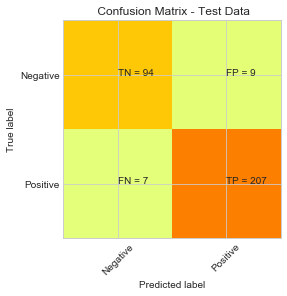

In [42]:
# for random forest Classifier
cm_rf = confusion_matrix(y_test,y_predict)
conf(cm_rf)

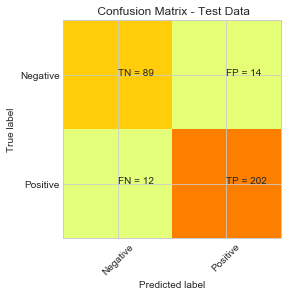

In [43]:
#for decision tree classifier

cm_dt = confusion_matrix(y_test,y_pred_d)
conf(cm_dt)

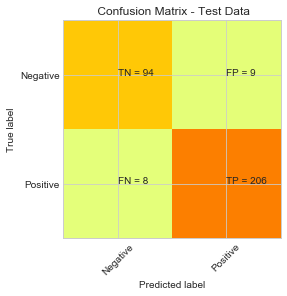

In [44]:
# for gaussian naive bayes classifier

cm_g = confusion_matrix(y_test,y_predic)
conf(cm_g)

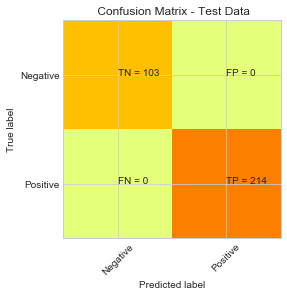

In [45]:
# for linear svc

cm_lsvc = confusion_matrix(y_test,y_pred_svc)
conf(cm_lsvc)

f1 score for classifier

In [46]:
from sklearn.metrics import f1_score
print("decision tree f1 score:",f1_score(y_test,y_pred_d,average = 'binary')) ## for decision tree
print("linear_svc f1 score:",f1_score(y_test,y_pred_svc,average = 'binary'))
print("random forest classifier f1 score",f1_score (y_test,y_predict,average = 'binary'))
print("gaussian naive bayes classification",f1_score(y_test,y_predict,average = 'binary'))

decision tree f1 score: 0.9395348837209302
linear_svc f1 score: 1.0
random forest classifier f1 score 0.9627906976744186
gaussian naive bayes classification 0.9627906976744186


Ensemble of logistic regression,gaussian NB,decision tree and linear svc using voting classifier

In [58]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = GaussianNB()
model3 = DecisionTreeClassifier(random_state = 1)
model4 = RandomForestClassifier()
m = VotingClassifier(estimators=[('lr', model1), ('gnb', model2),('dt',model3),('rf',model4)], voting='hard')
m.fit(X_train,y_train)
pre = m.predict(X_test)
print(m.score(X_test,y_test))
print(f1_score(y_test,pre,average = 'binary'))

0.9716088328075709
0.9787234042553192


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Same ensemble with last model as Linear Support vector classifier

In [60]:
model5 = LinearSVC();
m1 = VotingClassifier(estimators=[('lr', model1), ('gnb', model2),('dt',model3),('svc',model5)], voting='hard')
m1.fit(X_train,y_train)
pre = m1.predict(X_test)
print(m1.score(X_test,y_test))
print(f1_score(y_test,pre,average = 'binary'))

0.9873817034700315
0.9906103286384976


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Ensemble using bagging classifier

In [71]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(RandomForestClassifier())
model.fit(X_train, y_train)
p1 = model.predict(X_test)
print(model.score(X_test,y_test))
print(f1_score(y_test,p1,average='binary'))

0.9558359621451105
0.967741935483871


In [74]:
m3 = BaggingClassifier(DecisionTreeClassifier(random_state = 1))
m3.fit(X_train,y_train)
p2 = m3.predict(X_test)
print(m3.score(X_test,y_test))
print(f1_score(y_test,p2,average='binary'))

0.9211356466876972
0.9417249417249418


In [75]:
m4 = BaggingClassifier(GaussianNB())
m4.fit(X_train,y_train)
p3 = m4.predict(X_test)
print(m4.score(X_test,y_test))
print(f1_score(y_test,p3,average = 'binary'))

0.943217665615142
0.9579439252336449


In [76]:
m5 = BaggingClassifier(LogisticRegression())
m5.fit(X_train,y_train)
p4 = m5.predict(X_test)
print(m5.score(X_test,y_test))
print(f1_score(y_test,p4,average = 'binary'))


0.9905362776025236
0.9930069930069931
